In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# TODO:
# 1. Data cleaning (e.g. Removing empty values)
# 2. Find features that matter using PCA
# 3. Take the features to be trained on Linear Regression 
# 4. Train dataset to a neural network model
# 5. Compare Linear Regression result and neural model's results

In [4]:
train = pd.read_csv('train.csv', index_col = 0)
train['sex'] = train['SEX'].map({ 'Female':0, 'Male':1 })
train['mar'] = train['MAR'].map({ 'single': int(0), 'married': int(1) })
train['PAY'] = train['PAY'].map({ 'Y': 'Yes', 'N': 'No' })
train['pay'] = train['PAY'].map({ 'N':0, 'Y':1 })
train.head(10)

,AGE,SEX,EDU,MAR,CRE,BILL_1,BILL_2,BILL_3,STA_1,STA_2,STA_3,AMT_1,AMT_2,AMT_3,PAY,sex,mar,pay
ID,,,,,,,,,,,,,,,,,,
1,25,Male,HighSchool,single,3555,2541,1394,1250,duly,duly,duly,143,107,71,Yes,1,0.0,NaN
2,35,Female,College,single,6399,6418,4830,2424,delay,delay,delay,220,889,79,Yes,0,0.0,NaN
3,50,Female,College,married,1422,1603,1515,1433,delay,delay,delay,0,0,35,No,0,1.0,NaN
4,45,Female,Graduate,single,16353,14591,14204,14872,duly,duly,duly,1068,1244,1069,Yes,0,0.0,NaN
5,45,Female,Graduate,married,19197,54,0,0,NaN,NaN,NaN,0,0,0,Yes,0,1.0,NaN
6,37,Male,HighSchool,married,10665,10839,10605,10185,delay,delay,delay,231,18,306,No,1,1.0,NaN
7,32,Female,College,married,1422,1445,1094,779,delay,duly,duly,42,28,44,No,0,1.0,NaN
8,28,Male,College,single,27729,10282,8509,3187,duly,duly,duly,469,369,359,Yes,1,0.0,NaN
9,45,Male,College,married,2133,1052,1050,1170,delay,delay,delay,55,96,26,No,1,1.0,NaN


# 1. Data Exploration

<AxesSubplot:xlabel='EDU', ylabel='count'>

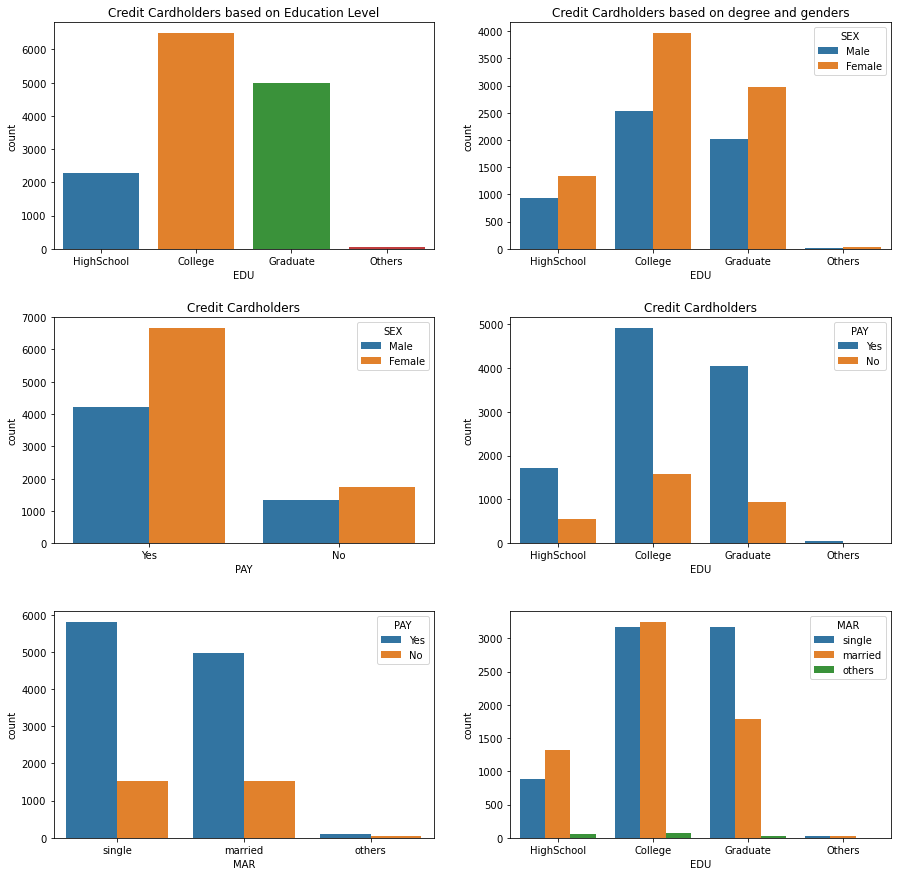

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

plt.subplots_adjust(hspace = 0.3)

sns.countplot(ax = axes[0,0], data = train, x = 'EDU')
axes[0,0].set_title("Credit Cardholders based on Education Level")

sns.countplot(ax = axes[0,1], data = train, x = 'EDU', hue = 'SEX')
axes[0,1].set_title("Credit Cardholders based on degree and genders")

sns.countplot(ax = axes[1,0], data = train, x = 'PAY', hue = 'SEX')
axes[1,0].set_title("Credit Cardholders")

sns.countplot(ax = axes[1,1], data = train, x = 'EDU', hue = 'PAY')
axes[1,1].set_title("Credit Cardholders")

sns.countplot(ax = axes[2,0], data = train, x = 'MAR', hue = 'PAY')
axes[2,0].set_title("Credit Cardholders")

sns.countplot(ax = axes[2,1], data = train, x = 'EDU', hue = 'MAR')
axes[2,1].set_title("Credit Cardholders")

Text(0.5, 1.0, 'Credit Cardholders by Age')

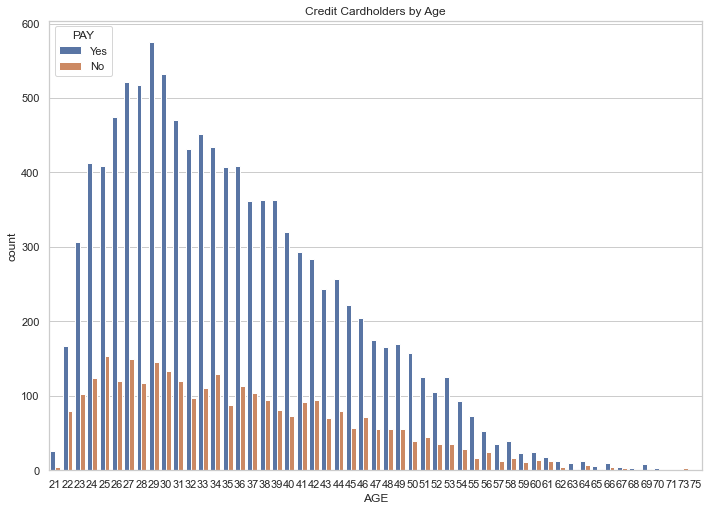

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(data = train, x = 'AGE', hue = 'PAY')
plt.title('Credit Cardholders by Age')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
